### Start

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or 

In [2]:
!pip install tensorflow==1.6.0-rc1

In [3]:
!pip uninstall keras

Uninstalling Keras-2.3.1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras-2.3.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/docs/*
    /usr/local/lib/python3.6/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.6/dist-packages/docs/update_docs.py
Proceed (y/n)? y
  Successfully uninstalled Keras-2.3.1


In [4]:
import tensorflow as tf
print(tf.__version__)

1.6.0-rc1


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

{}

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [0]:
!kaggle datasets list -s nih-chest

ref                                         title                                                size  lastUpdated          downloadCount  
------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
nih-chest-xrays/data                        NIH Chest X-rays                                     42GB  2018-02-21 20:52:23          33767  
nih-chest-xrays/sample                      Random Sample of NIH Chest X-ray Dataset              4GB  2017-11-23 02:58:24           8673  
neilturley/nihcc-chest-xray                 NIHCC Chest X-Ray                                     2GB  2020-03-18 05:27:14             82  
jbeltranleon/nih-chest-xrays-224-gray       NIH Chest X-rays 224 Gray                             2GB  2019-10-19 21:52:09              5  
kokyew93/nihdata                            NIHdata                                              13GB  2020-02-09 01:16:59             50  
zhuangjw/chest-xray-

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!kaggle datasets download -d nih-chest-xrays/data -p /content/gdrive/My\ Drive/kaggle/lung

 45% 18.8G/42.0G [07:59<09:51, 42.1MB/s]
User cancelled operation
Exception KeyboardInterrupt in <module 'threading' from '/usr/lib/python2.7/threading.pyc'> ignored


In [6]:
!unzip  /content/gdrive/My\ Drive/FPA_small.zip

Streaming output truncated to the last 5000 lines.
 extracting: FPA_small/00012228_000.png  
 extracting: FPA_small/00012228_001.png  
 extracting: FPA_small/00012229_000.png  
 extracting: FPA_small/00012229_005.png  
 extracting: FPA_small/00012233_000.png  
 extracting: FPA_small/00012233_004.png  
 extracting: FPA_small/00012233_005.png  
 extracting: FPA_small/00012233_006.png  
 extracting: FPA_small/00012233_007.png  
 extracting: FPA_small/00012233_008.png  
 extracting: FPA_small/00012233_009.png  
 extracting: FPA_small/00012233_010.png  
 extracting: FPA_small/00012234_000.png  
 extracting: FPA_small/00012237_000.png  
 extracting: FPA_small/00012237_001.png  
 extracting: FPA_small/00012239_000.png  
 extracting: FPA_small/00012247_000.png  
 extracting: FPA_small/00012247_001.png  
 extracting: FPA_small/00012247_002.png  
 extracting: FPA_small/00012248_000.png  
 extracting: FPA_small/00012249_000.png  
 extracting: FPA_small/00012250_000.png  
 extracting: FPA_small/00

In [7]:
all_xray_df = pd.read_csv('FPA_small/FPA.csv')
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('FPA','*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
all_xray_df.sample(3)

Scans found: 0 , Total Headers 18614


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],path
1256,00001007_001.png,No Finding,1,1007,55,F,PA,2544,3056,0.139,0.139,None
16235,00014787_002.png,No Finding,2,14787,50,F,PA,2526,2509,0.143,0.143,None
3977,00003047_000.png,No Finding,0,3047,57,F,PA,2990,2991,0.143,0.143,None


In [8]:
all_xray_df['Finding Labels'] = all_xray_df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
from itertools import chain
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(10)

All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
12626,00011466_000.png,,0,11466,38,F,PA,2602,2217,0.143,0.143,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16274,00014822_032.png,,32,14822,62,F,PA,2782,2991,0.143,0.143,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14911,00013564_002.png,,2,13564,40,F,PA,2992,2991,0.143,0.143,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
552,00000430_000.png,,0,430,65,F,PA,2048,2500,0.171,0.171,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3735,00002843_019.png,,19,2843,59,F,PA,2048,2500,0.168,0.168,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16006,00014593_000.png,,0,14593,22,F,PA,2790,2685,0.143,0.143,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11025,00009993_003.png,,3,9993,44,F,PA,2048,2500,0.168,0.168,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9192,00008175_002.png,,2,8175,44,F,PA,2682,2991,0.143,0.143,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15845,00014429_003.png,,3,14429,62,F,PA,2686,2757,0.143,0.143,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9387,00008342_026.png,Nodule,26,8342,40,F,PA,2048,2500,0.168,0.168,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [0]:
all_xray_df['disease_vec'] = all_xray_df.apply(lambda x: [x[all_labels].values], 1).map(lambda x: x[0])

In [10]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(all_xray_df, 
                                   test_size = 0.25, 
                                   random_state = 2018,
                                   stratify = all_xray_df['Finding Labels'].map(lambda x: x[:4]))
print('train', train_df.shape[0], 'validation', valid_df.shape[0])

train 13960 validation 4654


In [0]:
!pip install keras==2.1.4

  Using cached https://files.pythonhosted.org/packages/86/45/a273fe3f8fe931a11da34fba1cb74013cfc70dcf93e5d8d329c951dc44c5/Keras-2.1.4-py2.py3-none-any.whl
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.1.4 which is incompatible.
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [0]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (128, 128)
core_idg = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range= 0.05, 
                              width_shift_range=0.1, 
                              rotation_range=5, 
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.15)

In [0]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' # since we have the full path
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    return df_gen

In [0]:
train_gen = flow_from_dataframe(core_idg, train_df, 
                             path_col = 'path',
                            y_col = 'disease_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 32)

valid_gen = flow_from_dataframe(core_idg, valid_df, 
                             path_col = 'path',
                            y_col = 'disease_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 256) # we can use much larger batches for evaluation
# used a fixed dataset for evaluating the algorithm
test_X, test_Y = next(flow_from_dataframe(core_idg, 
                               valid_df, 
                             path_col = 'path',
                            y_col = 'disease_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 1024)) # one big batch

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 13960 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 4654 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 4654 images


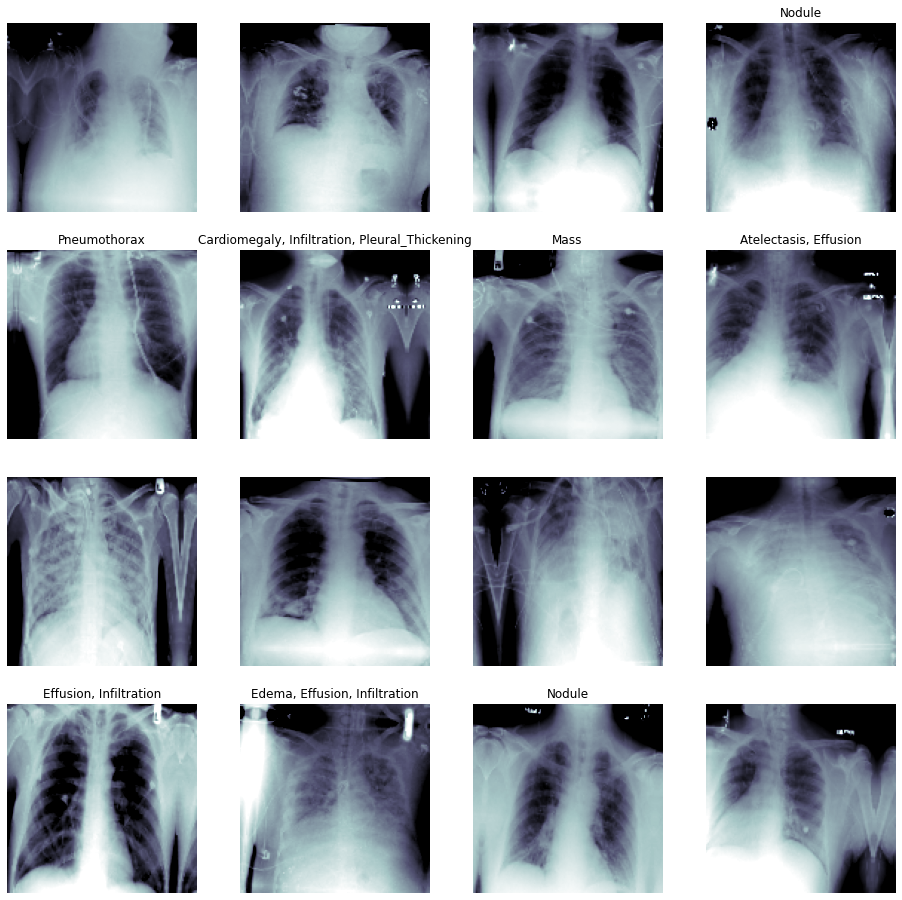

In [0]:
t_x, t_y = next(train_gen)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = -1.5, vmax = 1.5)
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(all_labels, c_y) 
                             if n_score>0.5]))
    c_ax.axis('off')

In [0]:
!pip install keras --upgrade

  Using cached https://files.pythonhosted.org/packages/ad/fd/6bfe87920d7f4fd475acd28500a42482b6b84479832bdc0fe9e589a60ceb/Keras-2.3.1-py2.py3-none-any.whl
  Found existing installation: Keras 2.1.4
    Uninstalling Keras-2.1.4:
      Successfully uninstalled Keras-2.1.4


In [0]:
from keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.models import Sequential
base_mobilenet_model = MobileNet(input_shape =  t_x.shape[1:], 
                                 include_top = False, weights = None)
multi_disease_model = Sequential()
multi_disease_model.add(base_mobilenet_model)
multi_disease_model.add(GlobalAveragePooling2D())
multi_disease_model.add(Dropout(0.5))
multi_disease_model.add(Dense(512))
multi_disease_model.add(Dropout(0.5))
multi_disease_model.add(Dense(len(all_labels), activation = 'sigmoid'))
multi_disease_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy', 'mae'])
multi_disease_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Model)   (None, 4, 4, 1024)        3228288   
_________________________________________________________________
global_average_pooling2d_4 ( (None, 1024)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 14)                7182      
Total params: 3,760,270
Trainable params: 3,738,382
Non-trainable params: 21,888
_____________________________________________________________

In [0]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('xray_class')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=3)
callbacks_list = [checkpoint, early]

In [0]:
multi_disease_model.fit_generator(train_gen, 
                                  steps_per_epoch=100,
                                  validation_data = (test_X, test_Y), 
                                  epochs = 5, 
                                  callbacks = callbacks_list)

Epoch 1/5
100/100 [==============================] - 821s 8s/step - loss: 0.2872 - binary_accuracy: 0.9271 - mean_absolute_error: 0.1101 - val_loss: 0.4678 - val_binary_accuracy: 0.9383 - val_mean_absolute_error: 0.0735

Epoch 00001: val_loss improved from inf to 0.46783, saving model to xray_class_weights.best.hdf5
Epoch 2/5
100/100 [==============================] - 811s 8s/step - loss: 0.2304 - binary_accuracy: 0.9365 - mean_absolute_error: 0.1067 - val_loss: 0.2281 - val_binary_accuracy: 0.9385 - val_mean_absolute_error: 0.1298

Epoch 00002: val_loss improved from 0.46783 to 0.22806, saving model to xray_class_weights.best.hdf5
Epoch 3/5
100/100 [==============================] - 807s 8s/step - loss: 0.2055 - binary_accuracy: 0.9395 - mean_absolute_error: 0.1044 - val_loss: 0.2063 - val_binary_accuracy: 0.9363 - val_mean_absolute_error: 0.1120

Epoch 00003: val_loss improved from 0.22806 to 0.20632, saving model to xray_class_weights.best.hdf5
Epoch 4/5
100/100 [===================

### Here's the start of subsetting by F & AP

In [0]:
F = train_df.loc[train_df['Patient Gender'] == 'F']
F_AP = F.loc[F['View Position'] == 'AP']
valid_F = valid_df.loc[valid_df['Patient Gender'] == 'F']
valid_F_AP = valid_F.loc[valid_F['View Position'] == 'AP']


In [0]:
test_X_FAP, test_Y_FAP = next(flow_from_dataframe(core_idg, 
                               valid_F_AP, 
                             path_col = 'path',
                            y_col = 'disease_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 1024)) # one big batch

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 235 images


In [0]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path1="{}_weights.best.hdf5".format('xray_class')

checkpoint1 = ModelCheckpoint(weight_path1, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

early1 = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=3)
callbacks_list1 = [checkpoint1, early1]

In [0]:
F_AP_gen = flow_from_dataframe(core_idg, F_AP, 
                             path_col = 'path',
                            y_col = 'disease_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 32)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 688 images


In [0]:
multi_disease_model.fit_generator(F_AP_gen, 
                                  steps_per_epoch=100,
                                  validation_data = (test_X_FAP, test_Y_FAP), 
                                  epochs = 1, 
                                  callbacks = callbacks_list1)

Epoch 1/1
100/100 [==============================] - 705s 7s/step - loss: 0.2763 - binary_accuracy: 0.9352 - mean_absolute_error: 0.1094 - val_loss: 0.5787 - val_binary_accuracy: 0.9456 - val_mean_absolute_error: 0.0595

Epoch 00001: val_loss improved from inf to 0.57871, saving model to xray_class_weights.best.hdf5


In [0]:
for c_label, s_count in zip(all_labels, 100*np.mean(test_Y_FAP,0)):
    print('%s: %2.2f%%' % (c_label, s_count))

Atelectasis: 10.64%
Cardiomegaly: 3.83%
Consolidation: 5.96%
Edema: 4.26%
Effusion: 11.49%
Emphysema: 0.85%
Fibrosis: 0.43%
Hernia: 0.43%
Infiltration: 21.28%
Mass: 4.26%
Nodule: 2.13%
Pleural_Thickening: 2.13%
Pneumonia: 2.55%
Pneumothorax: 5.11%


In [0]:
pred_Y_FAP = multi_disease_model.predict(test_X_FAP, batch_size = 32, verbose = True)

235/235 [==============================] - 18s 78ms/step


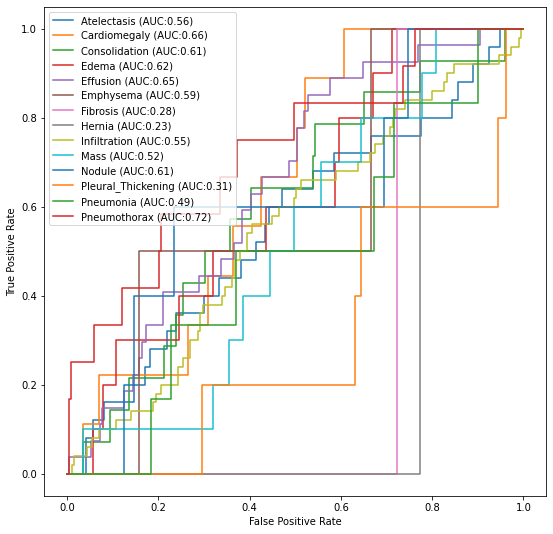

In [0]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y_FAP[:,idx].astype(int), pred_Y_FAP[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('barely_trained_net.png')

End of subsetting FAP

###Start of MAP

In [0]:
M = train_df.loc[train_df['Patient Gender'] == 'M']
M_AP = M.loc[M['View Position'] == 'AP']
valid_M = valid_df.loc[valid_df['Patient Gender'] == 'M']
valid_M_AP = valid_M.loc[valid_M['View Position'] == 'AP']

In [0]:
test_X_MAP, test_Y_MAP = next(flow_from_dataframe(core_idg, 
                               valid_M_AP, 
                             path_col = 'path',
                            y_col = 'disease_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 1024)) # one big batch

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 339 images


In [0]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path2="{}_weights.best.hdf5".format('xray_class')

checkpoint2 = ModelCheckpoint(weight_path1, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

early2 = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=3)
callbacks_list2 = [checkpoint2, early2]

In [0]:
M_AP_gen = flow_from_dataframe(core_idg, M_AP, 
                             path_col = 'path',
                            y_col = 'disease_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 32)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 951 images


In [0]:
multi_disease_model.fit_generator(M_AP_gen, 
                                  steps_per_epoch=100,
                                  validation_data = (test_X_MAP, test_Y_MAP), 
                                  epochs = 1, 
                                  callbacks = callbacks_list1)

Epoch 1/1
100/100 [==============================] - 731s 7s/step - loss: 0.2366 - binary_accuracy: 0.9394 - mean_absolute_error: 0.1041 - val_loss: 0.9580 - val_binary_accuracy: 0.9402 - val_mean_absolute_error: 0.0599

Epoch 00001: val_loss did not improve


In [0]:
for c_label, s_count in zip(all_labels, 100*np.mean(test_Y_MAP,0)):
    print('%s: %2.2f%%' % (c_label, s_count))

Atelectasis: 12.68%
Cardiomegaly: 2.06%
Consolidation: 6.78%
Edema: 3.83%
Effusion: 16.22%
Emphysema: 1.77%
Fibrosis: 0.29%
Hernia: 0.00%
Infiltration: 23.30%
Mass: 4.13%
Nodule: 4.42%
Pleural_Thickening: 3.24%
Pneumonia: 0.88%
Pneumothorax: 4.13%


In [0]:
pred_Y_MAP = multi_disease_model.predict(test_X_MAP, batch_size = 32, verbose = True)

339/339 [==============================] - 26s 77ms/step


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


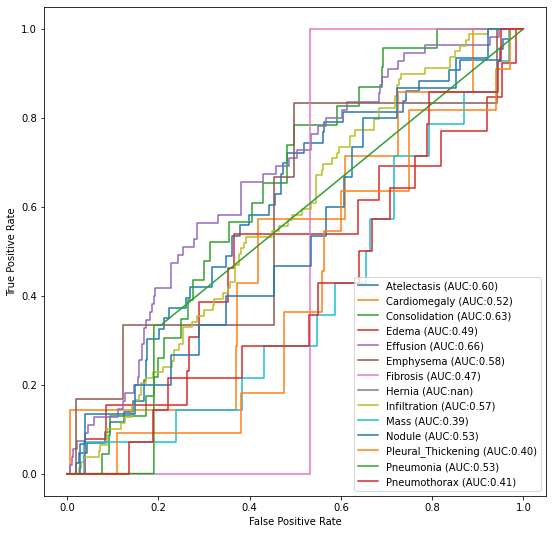

In [0]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y_MAP[:,idx].astype(int), pred_Y_MAP[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('barely_trained_net.png')

End of MAP

### Start of FPA

In [0]:
F_PA = F.loc[F['View Position'] == 'PA']
valid_F_PA = valid_F.loc[valid_F['View Position'] == 'PA']

In [0]:
test_X_FPA, test_Y_FPA = next(flow_from_dataframe(core_idg, 
                               valid_F_PA, 
                             path_col = 'path',
                            y_col = 'disease_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 1024)) # one big batch

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 391 images


In [0]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path3="{}_weights.best.hdf5".format('xray_class')

checkpoint3 = ModelCheckpoint(weight_path1, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

early3 = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=3)
callbacks_list3 = [checkpoint3, early3]

In [0]:
F_PA_gen = flow_from_dataframe(core_idg, F_PA, 
                             path_col = 'path',
                            y_col = 'disease_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 32)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1158 images


In [0]:
multi_disease_model.fit_generator(F_PA_gen, 
                                  steps_per_epoch=100,
                                  validation_data = (test_X_FPA, test_Y_FPA), 
                                  epochs = 1, 
                                  callbacks = callbacks_list3)

Epoch 1/1
100/100 [==============================] - 720s 7s/step - loss: 0.1865 - binary_accuracy: 0.9535 - mean_absolute_error: 0.0849 - val_loss: 0.1765 - val_binary_accuracy: 0.9565 - val_mean_absolute_error: 0.0848

Epoch 00001: val_loss improved from inf to 0.17654, saving model to xray_class_weights.best.hdf5


In [0]:
for c_label, s_count in zip(all_labels, 100*np.mean(test_Y_FPA,0)):
    print('%s: %2.2f%%' % (c_label, s_count))

Atelectasis: 6.14%
Cardiomegaly: 2.81%
Consolidation: 1.79%
Edema: 1.02%
Effusion: 8.70%
Emphysema: 2.56%
Fibrosis: 3.84%
Hernia: 0.00%
Infiltration: 13.30%
Mass: 5.12%
Nodule: 5.88%
Pleural_Thickening: 4.09%
Pneumonia: 0.00%
Pneumothorax: 5.63%


In [0]:
pred_Y_FPA = multi_disease_model.predict(test_X_FPA, batch_size = 32, verbose = True)

391/391 [==============================] - 30s 77ms/step


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


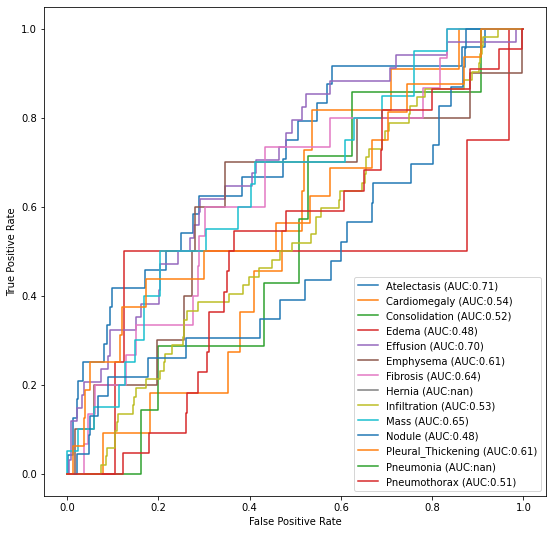

In [0]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y_FPA[:,idx].astype(int), pred_Y_FPA[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('barely_trained_net.png')

End of FPA

### Start of MPA

In [0]:
M_PA = M.loc[M['View Position'] == 'PA']
valid_M_PA = valid_M.loc[valid_M['View Position'] == 'PA']

In [0]:
test_X_MPA, test_Y_MPA = next(flow_from_dataframe(core_idg, 
                               valid_M_PA, 
                             path_col = 'path',
                            y_col = 'disease_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 1024)) # one big batch

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 437 images


In [0]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path4="{}_weights.best.hdf5".format('xray_class')

checkpoint4 = ModelCheckpoint(weight_path1, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

early4 = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=3)
callbacks_list4 = [checkpoint4, early4]

In [0]:
M_PA_gen = flow_from_dataframe(core_idg, M_PA, 
                             path_col = 'path',
                            y_col = 'disease_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 32)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1407 images


In [0]:
multi_disease_model.fit_generator(M_PA_gen, 
                                  steps_per_epoch=100,
                                  validation_data = (test_X_MPA, test_Y_MPA), 
                                  epochs = 1, 
                                  callbacks = callbacks_list4)

Epoch 1/1
100/100 [==============================] - 746s 7s/step - loss: 0.1699 - binary_accuracy: 0.9553 - mean_absolute_error: 0.0831 - val_loss: 0.1700 - val_binary_accuracy: 0.9565 - val_mean_absolute_error: 0.0706

Epoch 00001: val_loss improved from inf to 0.16998, saving model to xray_class_weights.best.hdf5


In [0]:
for c_label, s_count in zip(all_labels, 100*np.mean(test_Y_MPA,0)):
    print('%s: %2.2f%%' % (c_label, s_count))

Atelectasis: 8.01%
Cardiomegaly: 2.06%
Consolidation: 2.97%
Edema: 0.00%
Effusion: 9.84%
Emphysema: 2.97%
Fibrosis: 1.60%
Hernia: 0.92%
Infiltration: 13.96%
Mass: 5.72%
Nodule: 5.95%
Pleural_Thickening: 2.75%
Pneumonia: 1.37%
Pneumothorax: 2.75%


In [0]:
pred_Y_MPA = multi_disease_model.predict(test_X_MPA, batch_size = 32, verbose = True)

437/437 [==============================] - 33s 76ms/step


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


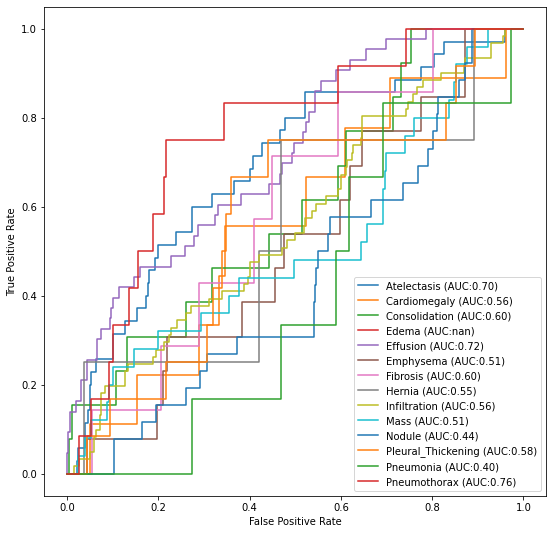

In [0]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y_MPA[:,idx].astype(int), pred_Y_MPA[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('barely_trained_net.png')

End of MPA

### Continue of General

In [0]:
for c_label, s_count in zip(all_labels, 100*np.mean(test_Y,0)):
    print('%s: %2.2f%%' % (c_label, s_count))

Atelectasis: 13.87%
Cardiomegaly: 2.15%
Consolidation: 8.20%
Edema: 4.98%
Effusion: 13.87%
Emphysema: 1.66%
Fibrosis: 0.78%
Hernia: 0.10%
Infiltration: 22.56%
Mass: 5.37%
Nodule: 4.39%
Pleural_Thickening: 2.05%
Pneumonia: 1.37%
Pneumothorax: 4.39%


In [0]:
pred_Y = multi_disease_model.predict(test_X, batch_size = 32, verbose = True)

1024/1024 [==============================] - 78s 76ms/step


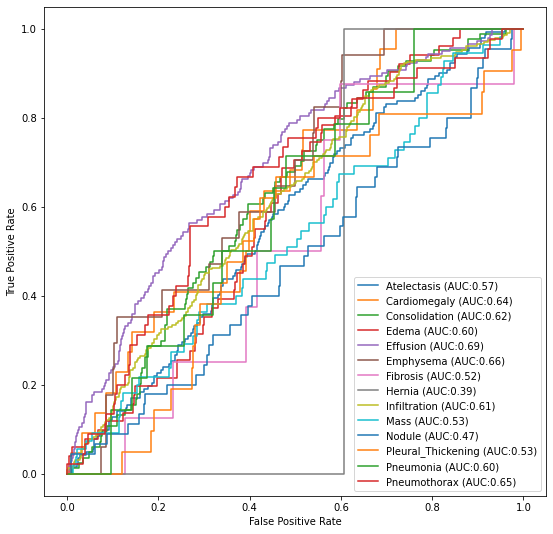

In [0]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), pred_Y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('barely_trained_net.png')

In [0]:
multi_disease_model.fit_generator(train_gen, 
                                  steps_per_epoch = 100,
                                  validation_data =  (test_X, test_Y), 
                                  epochs = 0, 
                                  callbacks = callbacks_list)

In [0]:
# load the best weights
multi_disease_model.load_weights(weight_path)

In [0]:
pred_Y = multi_disease_model.predict(test_X, batch_size = 32, verbose = True)

1024/1024 [==============================] - 81s 79ms/step


In [0]:
# look at how often the algorithm predicts certain diagnoses 
for c_label, p_count, t_count in zip(all_labels, 
                                     100*np.mean(pred_Y,0), 
                                     100*np.mean(test_Y,0)):
    print('%s: Dx: %2.2f%%, PDx: %2.2f%%' % (c_label, t_count, p_count))

Atelectasis: Dx: 8.01%, PDx: 12.07%
Cardiomegaly: Dx: 1.46%, PDx: 2.64%
Consolidation: Dx: 2.25%, PDx: 1.89%
Edema: Dx: 0.49%, PDx: 0.34%
Effusion: Dx: 9.08%, PDx: 22.35%
Emphysema: Dx: 2.25%, PDx: 2.50%
Fibrosis: Dx: 2.93%, PDx: 1.60%
Hernia: Dx: 0.29%, PDx: 0.32%
Infiltration: Dx: 11.13%, PDx: 20.26%
Mass: Dx: 4.20%, PDx: 3.71%
Nodule: Dx: 5.76%, PDx: 2.49%
Pleural_Thickening: Dx: 2.64%, PDx: 3.07%
Pneumonia: Dx: 1.27%, PDx: 1.17%
Pneumothorax: Dx: 2.83%, PDx: 2.59%


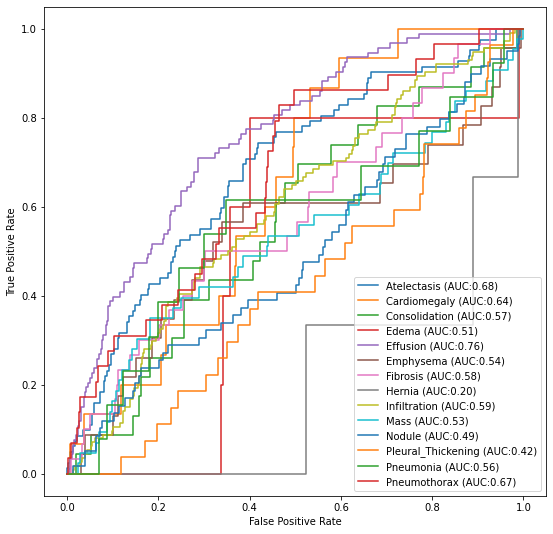

In [0]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), pred_Y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('trained_net.png')

In [0]:
sickest_idx = np.argsort(np.sum(test_Y, 1)<1)
fig, m_axs = plt.subplots(4, 2, figsize = (16, 32))
for (idx, c_ax) in zip(sickest_idx, m_axs.flatten()):
    c_ax.imshow(test_X[idx, :,:,0], cmap = 'bone')
    stat_str = [n_class[:6] for n_class, n_score in zip(all_labels, 
                                                                  test_Y[idx]) 
                             if n_score>0.5]
    pred_str = ['%s:%2.0f%%' % (n_class[:4], p_score*100)  for n_class, n_score, p_score in zip(all_labels, 
                                                                  test_Y[idx], pred_Y[idx]) 
                             if (n_score>0.5) or (p_score>0.5)]
    c_ax.set_title('Dx: '+', '.join(stat_str)+'\nPDx: '+', '.join(pred_str))
    c_ax.axis('off')
fig.savefig('trained_img_predictions.png')